# Linear Regression

In this notebook you will learn:
1. How to load a data file
2. How to use this data to train a simple machine learning regression model
3. How to evaluate the performance of your model
4. How to interpret your model


## Why Linear Regression

1. Simple model
2. Good interpretation of the coefficients
3. Computationally efficient
4. Low risk of overfitting
5. 5. Great baseline model for regression

# Imports

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
import pandas as pd
import numpy as np
import os

# Read the data

In [4]:
df = pd.read_csv('data/housing.csv')

In [5]:
df.head(5)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [6]:
df.shape

(489, 4)

There are 489 rows and 4 columns in this dataset 

## Some documentation about this data

Dataset taken from Boston census data. Contains socio-economic data as well as value of houses in each area

- **RM** - average number of rooms per house
- **LSTAT** - % lower status of the population
- **PTRATIO** - pupil-teacher ratio by town
- **MEDV** - Median value of owner-occupied homes

# Our goal

We wan to predict the house price given the socio-economic condition of the area.

# Why

## For Real Estate Agents and Companies

1. **Pricing Strategy**: Agents can set competitive prices for homes, informed by predictive data rather than solely relying on intuition or outdated benchmarks.
2. **Investment Scouting**: Identify underpriced neighborhoods or properties for investments.
3. **Marketing Focus**: Prioritize marketing efforts in areas where house prices are predicted to rise.

## For Homebuyers and Homeowners

1. **Negotiation Power**: Knowing the predicted median value can give buyers a stronger negotiating position.
2. **Long-term Investment**: Homebuyers can make more informed decisions about the future value of their investment.

## For Financial Institutions

1. **Risk Assessment**: Banks can better assess the risk associated with mortgage lending in different neighborhoods.
2. **Asset Valuation**: For institutions holding real estate assets, a predictive model can help in the accurate valuation of their portfolio.

![Example Image](../media/7ynd4l.jpg)

In [7]:
# define features and target
X = df[['RM','LSTAT','PTRATIO']]
y = df['MEDV']

In [8]:
# intialize the model
model = LinearRegression()

# train the model on this data
model.fit(X,y)

LinearRegression()

![Example Image](../media/7yndow.jpg)

Yup, the model just trained to use the features **RM**, **LSTAT** and **PTRATIO** to predict the **MEDV**. 

Let's look at the model predictions

In [14]:
preds = model.predict(X)

In [15]:
preds[:3].round(1) # showing first 3 predictions

# how many predictions do we have?
preds.shape

array([632371.7, 525177.1, 646753.1])

(489,)

Why did the model produce 489 predictions?

-----

Let's say we have a new neighborhood for which we want to have an estimate of the median house price.

In [17]:
new_neighborhood = pd.DataFrame(data=[[6.42, 8.04, 16.1]],
                                columns=['RM','LSTAT','PTRATIO'], index=['new neighborhood'])
new_neighborhood                       

,RM,LSTAT,PTRATIO
new neighborhood,6.42,8.04,16.1


How much would housing cost here?

In [18]:
prediction = model.predict(new_neighborhood)

In [19]:
prediction

array([570161.45407884])

The model predicts a median house will cost 570k$ in this neighborhood!

----

You can now head over to Exercise 1 - Linear Regression

![Example Image](../media/force.jpg)

# Can we trust out model's predictions?

Let's take a look at the first 5 rows of the dataset as well as their respective predictions

In [50]:
y.to_numpy()[:5]

array([504000., 453600., 728700., 701400., 760200.])

In [52]:
preds[:5].round(0)

array([632372., 525177., 646753., 624848., 611817.])

It is noticeable that our model is off, but how far off?

Let's look at the errors of the model by comparing its predictions to the actual prices

In [53]:
y - preds

0     -128371.739762
1      -71577.148313
2       81946.881920
3       76551.704130
4      148383.407464
           ...      
484     -1541.448492
485     -4797.202628
486    -46918.775678
487    -61950.456779
488   -192725.539836
Name: MEDV, Length: 489, dtype: float64

Pretty cool! Sometimes the model mistakes the price by 100k€, other times it is only slightly off

What error can we expect from this model, on average?

In [57]:
np.mean(y - preds)

8.379998626396944e-11

Zero doesnt' sound right. Can anyone guess why this is happening?

----

Besides the mean, how are my errors distributed?

In [28]:
errors = np.abs(y - preds)
errors.describe()

count       489.000000
mean      65458.439640
std       58529.854176
min          54.954736
25%       23275.299088
50%       50337.575514
75%       92006.405259
max      326444.255481
Name: MEDV, dtype: float64

We can also visualize a distribution using box plots!

<Axes: title={'center': 'distribution of the (absolute) errors'}>

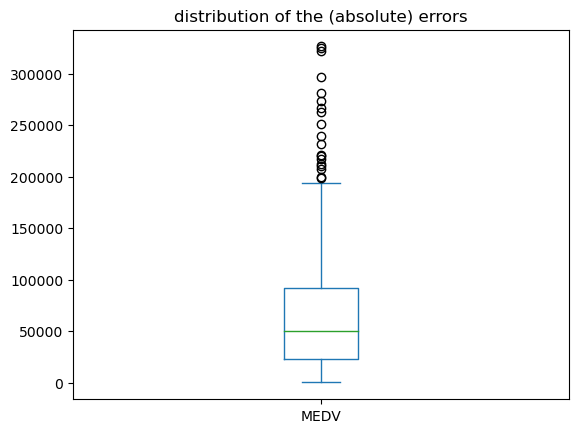

In [31]:
errors.plot.box(title='distribution of the (absolute) errors')

# Can we interpret a Linear Regression Model?

$$ y = \beta_0 x_0 + \beta_1 x_1 + \beta_2 x_2 + b$$

In [11]:
model.coef_
model.intercept_

array([ 86565.23613299, -10849.34038381, -19492.11563515])

415464.39651672955

Each coefficient corresponds to the trained $\beta$ parameters in the same order you passed to the model, so:

- $\beta_0$ corresponds to the 'RM' 
- $\beta_1$ corresponds to the 'LSTAT' 
- $\beta_2$ corresponds to the 'PTRATIO'

and finally, $b$ is the intercept parameter that adds a lot of flexibility to the model.

In [14]:
# We can confirm the Betas by listing the columns of X
X.columns

Index(['RM', 'LSTAT', 'PTRATIO'], dtype='object')

In a Linear Regression, $y$ is linear on the parameters $\beta$. This means that each $\beta_i$ represents the change in $y$ for a unit change in $x_i$.

And while the model isn't perfect by any means, we can make sense of how it is making its decisions:
1. $\beta_0$ is very high, which means that as we consider houses with more rooms, we expect the price to go up (**makes sense!**)
2. $\beta_1$ is negative, which means that a neighborhood where the % of low socio-economic status  population increases, then the house prices decrease (**makes sense!**)
3. $\beta_2$ is negative, which means that if for example, the pupil-teacher ration goes from 10 to 100, it means the quality of education won't be as good, making the price go down (**makes sense!**)